In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# 1. Load Dataset

In [0]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal Width')

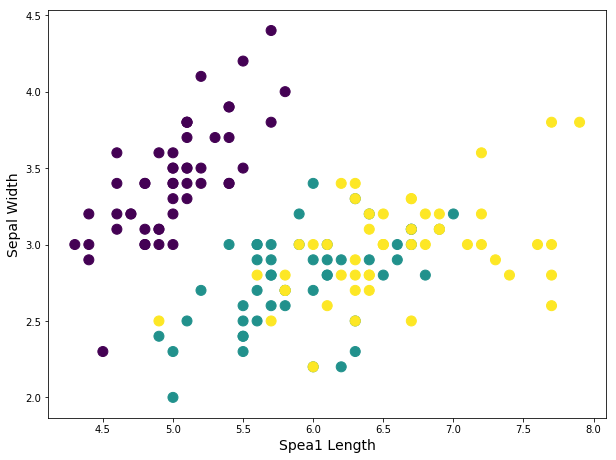

In [0]:
fig = plt.figure(figsize=(10, 7.5))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('Spea1 Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

# 2. K-Means Clustering

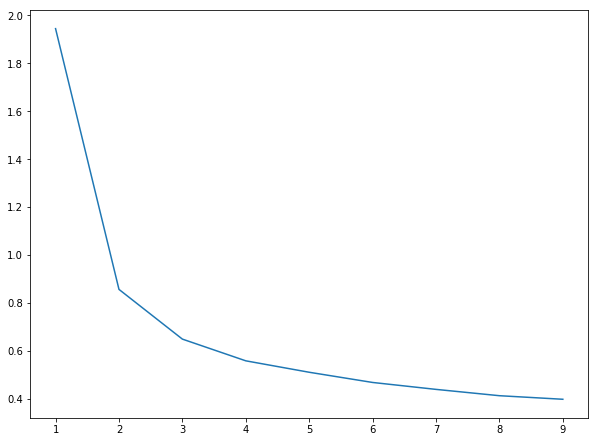

In [0]:
mean_dist = []

for k in range(1, 10):
  km = KMeans(n_clusters = k, random_state=42)
  km.fit(X)
  mean_dist.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

fig = plt.figure(figsize=(10, 7.5))
plt.plot(range(1, 10), mean_dist)

In [0]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

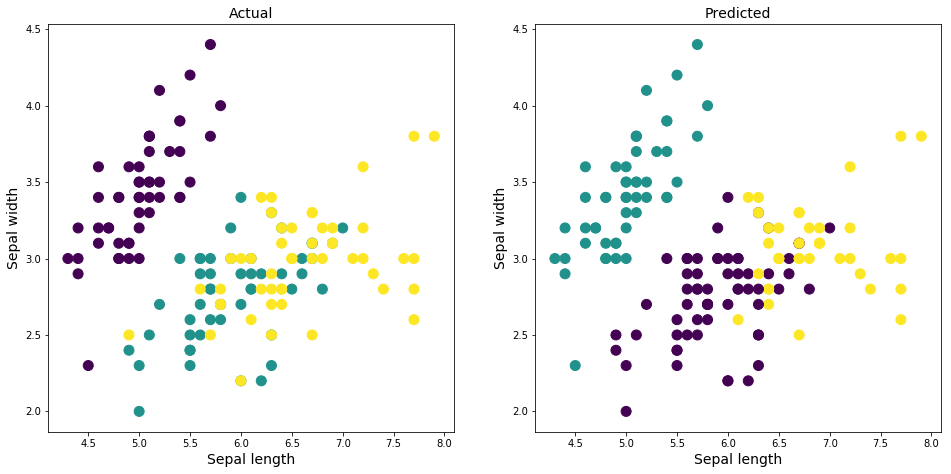

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7.5))

axes[0].scatter(X[:, 0], X[:, 1], c=y, s=100)
axes[0].set_xlabel('Sepal length', fontsize=14)
axes[0].set_ylabel('Sepal width', fontsize=14)
axes[0].set_title('Actual', fontsize=14)

axes[1].scatter(X[:, 0], X[:, 1], c=km.labels_, s=100)
axes[1].set_xlabel('Sepal length', fontsize=14)
axes[1].set_ylabel('Sepal width', fontsize=14)
axes[1].set_title('Predicted', fontsize=14)

# 2. Hierarchical Clustering

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use Ward Variance Minimization Algorithm
L = linkage(X, 'ward')

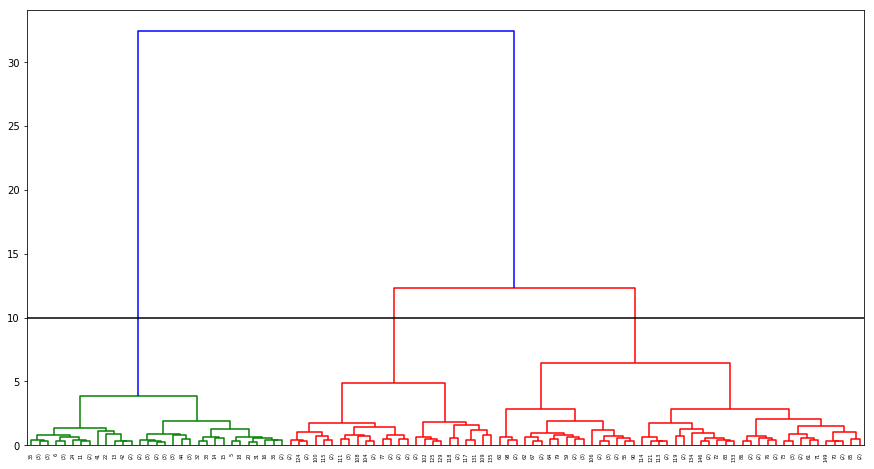

In [0]:
plt.figure(figsize=(15, 8))

dendrogram(L, truncate_mode='lastp', p=100)
plt.axhline(y=10, c='k')
plt.show()